## 1.文件读取
notes:
- !shell command 可以再 jupyter 里面执行 shell 命令
- wiki 数据提取
- pandas读取文件。常见中文编码方式（e.g. 'gb18030'）。
- pandas对表中数据进行filter（titanic_train）
- read from pickle

## 2.正则表达式
- html 文件中用正则抓取 http url

## 3.n-gram
用n-gram计算句子、短语的概率
### 3.1 词频统计 (BOW)
- 生成可以统计词频的函数的函数（lisp风格的变量作用于trick）
- 画出词频的分布曲线

============= 1-gram =============
total word count of corpus: 162585258
total vocabulary count: 392773
============= 2-gram =============
total word count of corpus: 63557530
total vocabulary count: 749114


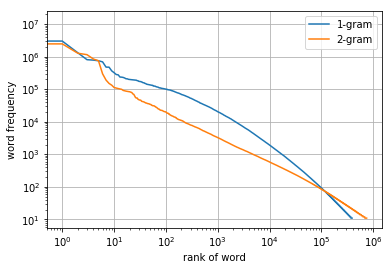

In [3]:
import matplotlib.pyplot as plt
import corpus_processing as cp

count_ngram1 = cp.load_obj('count_ngram1')
count_ngram2 = cp.load_obj('count_ngram2')

legend = []
def visualize_counter(word_count, name):
    global legend
    legend.append(name)
    freq = [f for gram, f in word_count.most_common()]
    plt.figure('counter')
    plt.loglog(freq)
    plt.grid(True)
    plt.xlabel('rank of word')
    plt.ylabel('word frequency')
    plt.legend(legend)
    print('=============',name,'=============')
    print('total word count of corpus:', sum(freq))
    print('total vocabulary count:', len(freq))
    
visualize_counter(count_ngram1,'1-gram')
visualize_counter(count_ngram2,'2-gram')
plt.show()

### 3.2 unigram
$\textbf{w} = w_1...w_i...w_n$

$P(\textbf{w}) = \prod_{i=1}^nP(w_i)$

In [2]:
from functools import reduce
import logging
import jieba
jieba.setLogLevel(logging.WARNING)

def get_prob_from_count(count):
    total_count = sum(count.values())
    return lambda w : count[w]/total_count

get_prob = get_prob_from_count(count_ngram1)

def uigram_prob(string):
    probs = [get_prob(tuple(token)) for token in cp.tokenize_string(string) if get_prob(tuple(token)) != 0]
    if not probs: 
        probs = [0]
    return reduce(lambda x, y: x*y , probs)


pair = """前天晚上吃晚饭的时候
前天晚上吃早饭的时候""".split('\n')

pair2 = """正是一个好看的小猫
真是一个好看的小猫""".split('\n')

pair3 = """我无言以对，简直
我简直无言以对""".split('\n')

def test_pair(pair, prob_func):
    print('===================================')
    for sent in pair:
        print(sent, prob_func(sent))
        
test_pair(pair, uigram_prob)
test_pair(pair2, uigram_prob)
test_pair(pair3, uigram_prob)

前天晚上吃晚饭的时候 0
前天晚上吃早饭的时候 7.796524823917308e-05
正是一个好看的小猫 0
真是一个好看的小猫 0
我无言以对，简直 0.0005237805754812039
我简直无言以对 0.0005237805754812039


### 3.3 bigram
$P(\textbf{w}) = \prod_{i=1}^nP(w_i|w_{i-1})= \prod_{i=1}^n\frac{P(w_{i-1},w_{i})}{P(w_{i-1})}$

## 3.4 Good–Turing frequency estimation
reference: 
https://www.wikiwand.com/en/Good%E2%80%93Turing_frequency_estimation

## 4.机器学习基础
- linear regression推导
- 实现梯度下降，及其可视化

assumption for linear regression:

$Y\sim N(wx,\sigma^2)\equiv P_{w,\sigma^2}(y|x) = \frac{1}{\sqrt{2\pi\sigma^2}}exp\left[-\frac{(y-wx)^2}{2\sigma^2}\right]$

MLE for all instanse in the training set with the size of n:

$\hat{w} = argmax_w \prod_{i=1}^n P_{w,\sigma^2}(y_i|x_i) = argmax_w \frac{1}{\sqrt{2\pi\sigma^2}}\prod_{i=1}^n exp\left[-\frac{(y_i-wx_i)^2}{2\sigma^2}\right]$

take logrithm on both sides:

$\hat{w} = argmax_w \sum_{i=1}^n - [(y_i-wx_i)^2 - 2\sigma^2] = argmin_w \sum_{i=1}^n (y_i-wx_i)^2 $



so linear regression model:

$y=\hat{w}x \qquad s.t. \quad \hat{w} =argmin_w \sum_{i=1}^n (y_i-wx_i)^2$

define the loss function:

$L(w) = \sum_{i=1}^n (y_i-wx_i)^2 = ||Xw-Y||^2 = ||N((\hat{w}-w)X,\sigma^2)||^2$

gradient of loss function

$\bigtriangledown L =\frac{\partial{L}}{\partial{w}} = 2X^T(Xw-Y)$

---

1.close form solution:

   $\bigtriangledown L = 0 \qquad \equiv \qquad  2X^T(Xw-Y) = 0$
   
   $X_{n*d},w_{d*1},Y_{n*1}$

   $w = (X^TX)^{-1}X^TY$

   complexity ananlysis:

   $temp1_{d*d} = X^TX \rightarrow O(n^{2.3728639})$

   $temp2_{d*d} = temp1^{-1}\rightarrow O(n^{2.3728639})$

   $temp3_{d*1}=X^TY \rightarrow O(n^{d*n*1})$

   $result = temp2*temp3 \rightarrow O(d*d*1)$

   overall complexity is $O(n^{2.3728639})$



---
2.gradient desent

   $w_{t+1}= w_{t}-\eta\bigtriangledown L $

   $w_{t+1}= w_{t}-\eta X^T(Xw-Y)$

   complexity ananlysis:

   $temp1_{n*1} = Xw \rightarrow O(n*d*1)$

   $temp2_{n*1} = temp1-Y \rightarrow O(n)$

   $gradient_{d*1} = X^Ttemp2 \rightarrow O(d*n*1)$

   repeat k iteration step

   Overall complexity is $O(k*d*n)$, where k<<n, d<<n



references of matrix computation: https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations

